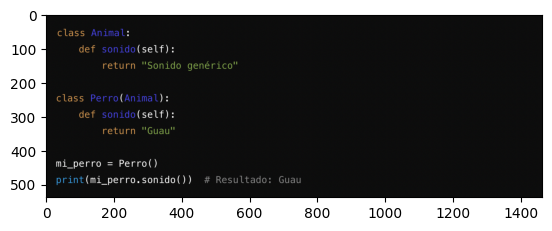

In [85]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r"..\source\Tesseract-OCR\tesseract.exe"

code = cv2.imread("..\data\codpy.png")


plt.imshow(code)

In [86]:
if code is None:
    raise ValueError("La imagen no se cargó. Revisa la ruta del archivo.")
else:
    print("Todo bien")

Todo bien


In [87]:
list_result = pytesseract.image_to_string(code)
print(list_result)

class Animal:
def sonido(self):
return "Sonido genérico"

class Perro(Animal):
def sonido(self):
return "Guau"

mi_perro = Perro()
print(mi_perro.sonido()) # Resultado: Guau



In [88]:
data = pytesseract.image_to_data(code, output_type=pytesseract.Output.DATAFRAME)
data_ = data.dropna().reset_index(drop=True)
data_ = data[data["word_num"] == 1]

Indentacion 0: 30.00 a 43.90, elementos = 4.0
Indentacion 1: 85.60 a 99.50, elementos = 2.0
Indentacion 2: 155.10 a 169.00, elementos = 2.0


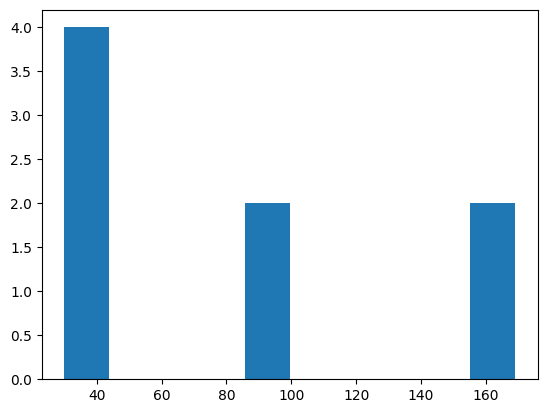

In [89]:
counts, bins, _ = plt.hist(data_["left"])

clases = []
count = 0
for i in range(len(bins)-1):
    if counts[i] > 0:
        print(f"Indentacion {count}: {bins[i]:.2f} a {bins[i+1]:.2f}, elementos = {counts[i]}")
        count += 1
        clases.append((bins[i], bins[i+1]))
        
        
        

In [90]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1464,538,-1.000000,NaN
1,2,1,1,0,0,0,34,44,530,123,-1.000000,NaN
2,3,1,1,1,0,0,34,44,530,123,-1.000000,NaN
3,4,1,1,1,1,0,34,44,210,21,-1.000000,NaN
4,5,1,1,1,1,1,34,44,79,21,96.297958,class
5,5,1,1,1,1,2,134,44,110,21,95.276741,Animal:
6,4,1,1,1,2,0,98,90,279,25,-1.000000,NaN
7,5,1,1,1,2,1,98,92,47,21,93.142075,def
8,5,1,1,1,2,2,167,90,210,25,92.047737,sonido(self):
9,4,1,1,1,3,0,169,139,395,28,-1.000000,NaN


In [91]:


# Limpiar nulos o vacíos en texto
data = data.dropna(subset=['text'])
data = data[data['text'].str.strip() != '']

# Agrupar por los identificadores de línea
lines = (data
    .sort_values(['block_num', 'par_num', 'line_num', 'left'])  # mantener orden visual
    .groupby(['page_num', 'block_num', 'par_num', 'line_num'], as_index=False)
    .agg({
        'left': 'min',                    # tomar el left más bajo (primera palabra)
        'text': lambda x: ' '.join(x)     # concatenar las palabras
    })
)

lines.head(100)


,page_num,block_num,par_num,line_num,left,text
0,1,1,1,1,34,class Animal:
1,1,1,1,2,98,def sonido(self):
2,1,1,1,3,169,"return ""Sonido genérico"""
3,1,2,1,1,32,class Perro(Animal):
4,1,2,1,2,98,def sonido(self):
5,1,2,1,3,169,"return ""Guau"""
6,1,3,1,1,30,mi_perro = Perro()
7,1,3,1,2,32,print(mi_perro.sonido()) # Resultado: Guau


In [92]:
print("jsjsjs\n" + "    " + "aaaa")

jsjsjs
    aaaa


In [93]:

counts, bins, _ = plt.hist(lines["left"])
plt.close()

clases = []
for i in range(len(bins)-1):
    if counts[i] > 0:
        clases.append((bins[i], bins[i+1]))

def obtener_indentacion(numero):
    for i, (start, end) in enumerate(clases):
        if start <= numero < end:
            return i
    return len(clases) - 1  # si no entra en ningún intervalo, asignar al último

lines["Indentacion"] = lines["left"].apply(obtener_indentacion)


In [94]:
lines

,page_num,block_num,par_num,line_num,left,text,Indentacion
0,1,1,1,1,34,class Animal:,0
1,1,1,1,2,98,def sonido(self):,1
2,1,1,1,3,169,"return ""Sonido genérico""",2
3,1,2,1,1,32,class Perro(Animal):,0
4,1,2,1,2,98,def sonido(self):,1
5,1,2,1,3,169,"return ""Guau""",2
6,1,3,1,1,30,mi_perro = Perro(),0
7,1,3,1,2,32,print(mi_perro.sonido()) # Resultado: Guau,0


In [95]:
string = ""

for i in range(len(lines)):
    if lines.iloc[i]["line_num"] == 1:
        aux = "\n"
    else:
        aux = ""
    aux += lines.iloc[i]["Indentacion"] * "\t" + lines.iloc[i]["text"] + "\n"
    string += aux

print(string)



class Animal:
	def sonido(self):
		return "Sonido genérico"

class Perro(Animal):
	def sonido(self):
		return "Guau"

mi_perro = Perro()
print(mi_perro.sonido()) # Resultado: Guau

